Import all dependencies that will be required

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Fetch the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/samariwa/artificial-intelligence-projects/refs/heads/main/iris.data', header=None, encoding='utf-8')

View the data to confirm

In [25]:
df.shape[0]

150

In [24]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Separate the features from the labels and get the correlation between the features. Visualize that on a heatmap.

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
matrix = X.corr()
X.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


<Axes: >

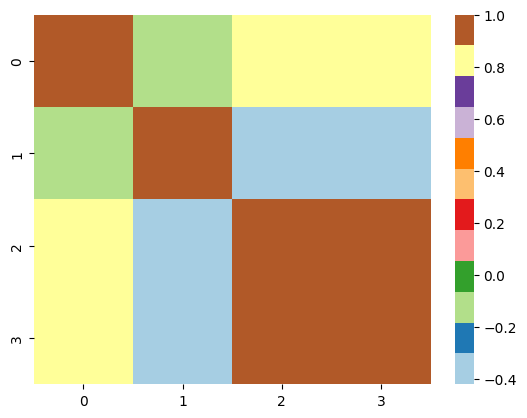

In [7]:
sns.heatmap(matrix, cmap="Paired")

Split the data into training set and test set. The training set will be 80% of the data and test set 20% of it.

In [8]:
X_train,X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Define the models that will be used and initialize them. Use stratified k fold cross validation to train and test the data with 10 splits for each algorithms and compare performance.

In [9]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)

  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


Plot the results on a box plot

<ipython-input-10-2a985f40c84d>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


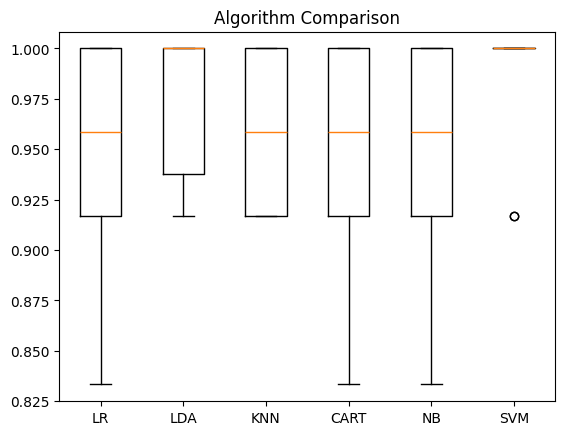

In [10]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

SVC gives the best accuracy for this scenario, therefore, it is the selected model for making predictions.

In [11]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [12]:
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



The flower data provided with 4 features and 150 instances has 3 classes of classification; Iris-setosa, Iris-versicolor, Iris-virginica. From the tested classification algorithms Support Vector Machine Classifier was the best with a consistent accuracy score. This could be seen in the box and whisker plot where the deviation of the results from the mean was so narrow while having a very high mean.
For this reason the algorithm was used to build the model and tested. This gave an accuracy score of 96.67%. This was achieved using 30 test instances which represent 20% of the dataset.
The model was able to identify 'Iris-setosa' in all instances of prediction given the f1-score which is a harmonic representation of the class performance factoring in the precision and recall scores.
The Linear Discriminant Analysis algorithm also performed fairly well but was not a reliable model due to its huge deviation from the mean which could possibly indicate overfitting in some instances of the cross-validation.